# Capstone Webscrapping using BeautifulSoup

<br>

<details>
    <summary>✨ This notebook contain complete notebook to run Capstone Poject Webscrapping using BeautifulSoup by Affandry Taufik</summary>
</details>



## Create New Enviroment and Install Required Packages  

<br>

<details>
    <summary>✨ Create New Enviroment and Install Required Packages Create New Enviroment and Install Required Packages as below : </summary>
</details>



1. Check initial/Available Environemt

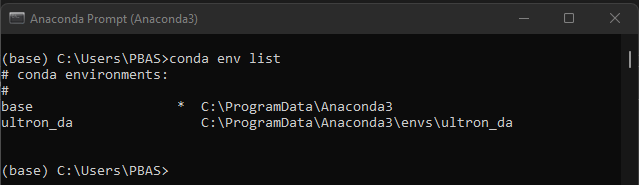

As image above, only contain old Environment which not contain required package for this Project. then we have to create new environment



2. Create new environment and named as **capstone_da**

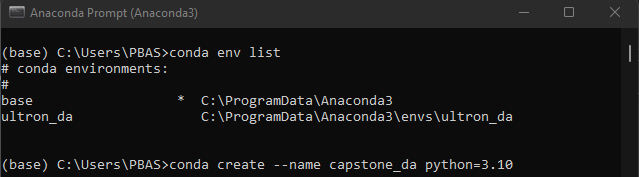

Then new environment created and named as capstone_da


3. Create new environment already successful

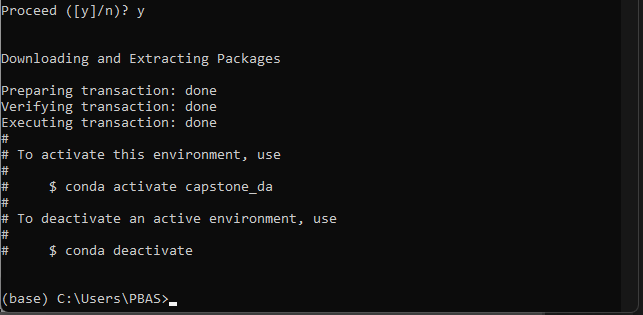

Create new environment  success

4. Activate new environment and change directory to Capstone Project to install required Package

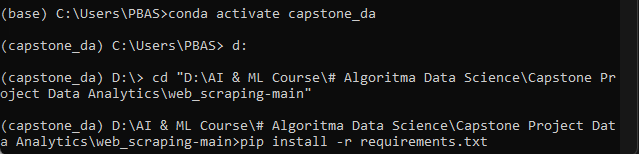

New environement activated then directory changed to Capstone Project to install required Package from **requirements.txt**

5. Intall all required packages success

![install%20packages%20based%20on%20requirement%20%20success.png](attachment:install%20packages%20based%20on%20requirement%20%20success.png)

Installation of all packages shown success, to **prove** that installed package already match with the requirements.txt. 
We should export our package list as .txt file then named **Installed_Package_at_capstone_da_Env** by using 
```
pip list --format=freeze > requirements.txt
```

6. Create new kernel and connecting the new environment to Jupyter Notebook 

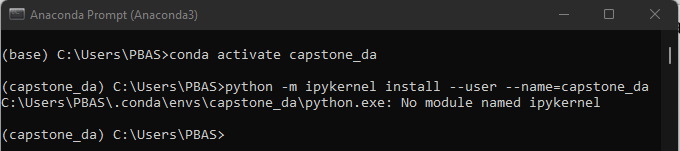

We should create our kernel then connect our new environment with Jupyter Notebook. Now, we are ready to work our Capstone Project with **isolated Environment** `Capstone_da`

## Finding the right key to scrap the data  & Extracting the right information

Sebelum melakukan scarpping, kita harus lihat laman Website yang ingin kita ambil datanya, dalam hal ini adalah :
*Before we conduct web scrapping, we should observe the targeted website :*
```
https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30
```
dengan tampilan laman sebagai berikut :
*here is the appearance of targeted website :*

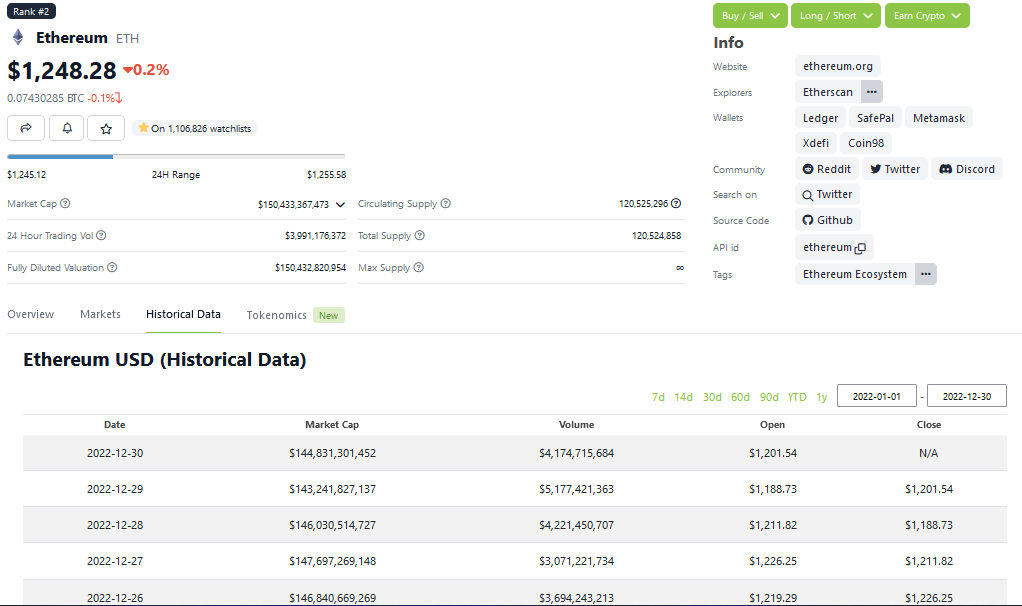



Target tabel/informasi yang ingin kita ambil datanya adalah tabel Ethereum USD (Historical Data). Sehingga kita perlu melihat/inspect element penulisan HTML pada laman tersebut.
*The target information that we want to scrap is the Ethereum USD (Historical Data) Table, So we should inspect the element to create this Table*

dari inspect element pada laman tersebut didapat bahwa Parent Tree dari penyusun tabel tsb adalah
*As we can see, the Parent tree from that table as shown below*

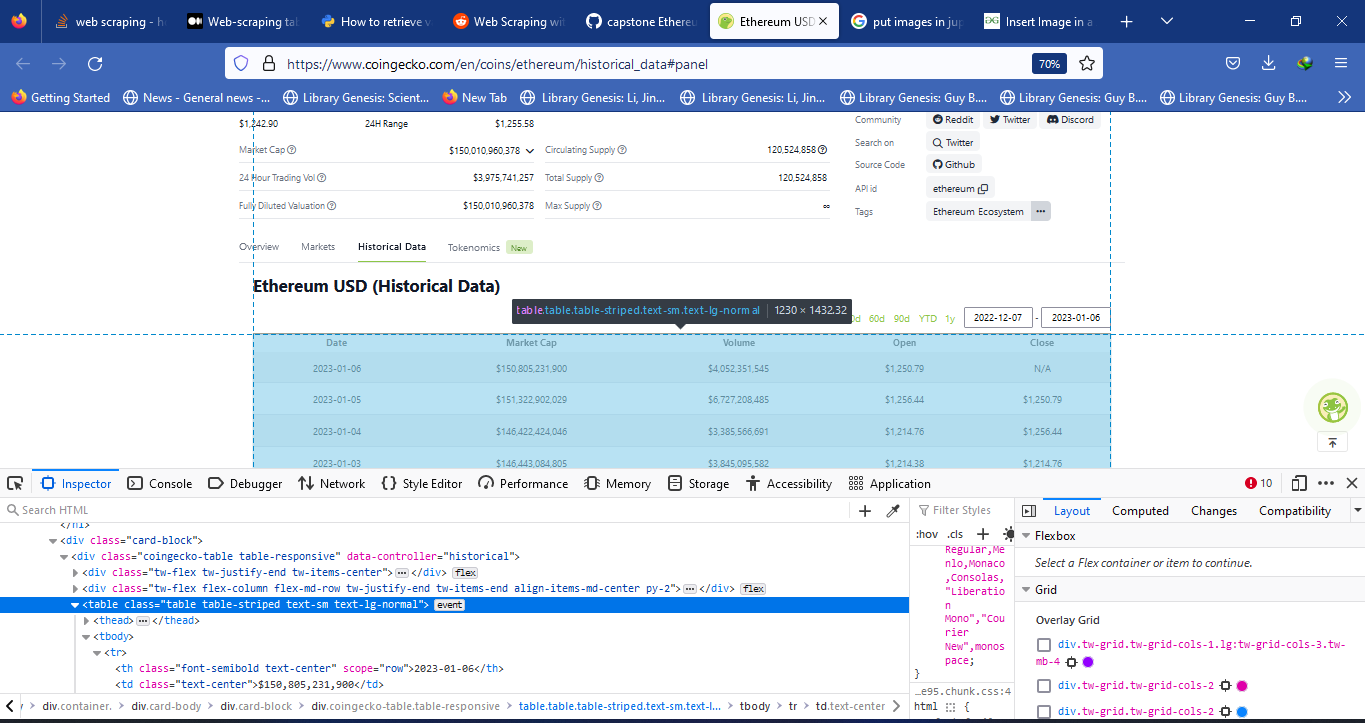

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30' 
url_get = requests.get(url,  headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


In [6]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [7]:
table.find_all('td', attrs={'class':'text-center'})[0:15]

[<td class="text-center">
 $253,607,549,372
 </td>,
 <td class="text-center">
 $27,149,143,847
 </td>,
 <td class="text-center">
 $2,169.40
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $243,040,539,437
 </td>,
 <td class="text-center">
 $30,629,329,806
 </td>,
 <td class="text-center">
 $2,087.52
 </td>,
 <td class="text-center">
 $2,169.40
 </td>,
 <td class="text-center">
 $229,354,016,311
 </td>,
 <td class="text-center">
 $24,316,408,028
 </td>,
 <td class="text-center">
 $1,973.93
 </td>,
 <td class="text-center">
 $2,087.52
 </td>,
 <td class="text-center">
 $209,989,265,221
 </td>,
 <td class="text-center">
 $24,249,510,321
 </td>,
 <td class="text-center">
 $1,817.05
 </td>]

Finding row length.

In [8]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

60

Do the scrapping process here (please change this markdown with your explanation)

In [9]:
temp = [] #init

for i in range(0, row_length):
    
    #get period 
    Dates = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    Dates = Dates.strip()
    
    Volume = table.find_all('td', attrs={'class':'text-center'})[1+i*4].text
    Volume = Volume.strip()
    
    temp.append((Dates,Volume)) 
    
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

In [10]:
temp = temp[::-1]
temp

[('2021-05-02', '$36,721,647,718'),
 ('2021-05-03', '$35,727,432,416'),
 ('2021-05-04', '$64,192,650,586'),
 ('2021-05-05', '$78,437,235,046'),
 ('2021-05-06', '$63,552,342,594'),
 ('2021-05-07', '$50,430,169,753'),
 ('2021-05-08', '$44,980,768,421'),
 ('2021-05-09', '$60,174,921,874'),
 ('2021-05-10', '$61,625,657,297'),
 ('2021-05-11', '$80,827,215,918'),
 ('2021-05-12', '$67,869,198,116'),
 ('2021-05-13', '$78,772,032,255'),
 ('2021-05-14', '$97,383,442,023'),
 ('2021-05-15', '$63,587,729,060'),
 ('2021-05-16', '$58,150,860,876'),
 ('2021-05-17', '$67,531,308,124'),
 ('2021-05-18', '$75,100,584,776'),
 ('2021-05-19', '$59,160,464,538'),
 ('2021-05-20', '$117,905,041,184'),
 ('2021-05-21', '$92,538,167,828'),
 ('2021-05-22', '$115,000,901,892'),
 ('2021-05-23', '$102,524,751,568'),
 ('2021-05-24', '$77,839,858,614'),
 ('2021-05-25', '$73,496,058,831'),
 ('2021-05-26', '$92,468,701,274'),
 ('2021-05-27', '$53,115,222,705'),
 ('2021-05-28', '$44,070,236,220'),
 ('2021-05-29', '$49,493,

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
import pandas as pd
pd.set_option("display.float_format", '{:,.2f}'.format)
df = pd.DataFrame(temp, columns = ('Dates','Volume'))
df.head()

,Dates,Volume
0,2021-05-02,"$36,721,647,718"
1,2021-05-03,"$35,727,432,416"
2,2021-05-04,"$64,192,650,586"
3,2021-05-05,"$78,437,235,046"
4,2021-05-06,"$63,552,342,594"


In [12]:
df.dtypes

Dates     object
Volume    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
df['Dates'] = df['Dates'].astype('datetime64')
df['Volume'] = df['Volume'].str.replace(',', '')
df['Volume'] = df['Volume'].str.replace('$', '')
df['Volume'] = df['Volume'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   60 non-null     datetime64[ns]
 1   Volume  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


C:\Users\PBAS\AppData\Local\Temp\ipykernel_14820\2556823321.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace('$', '')


In [14]:
df = df.set_index('Dates')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

[Text(0.5, 0, 'Dates'),
 Text(0, 0.5, 'Volume [USD]'),
 Text(0.5, 1.0, 'Plot Pergerakan Volume Perdagangan dari Ethereum Mei-Juni 2021')]

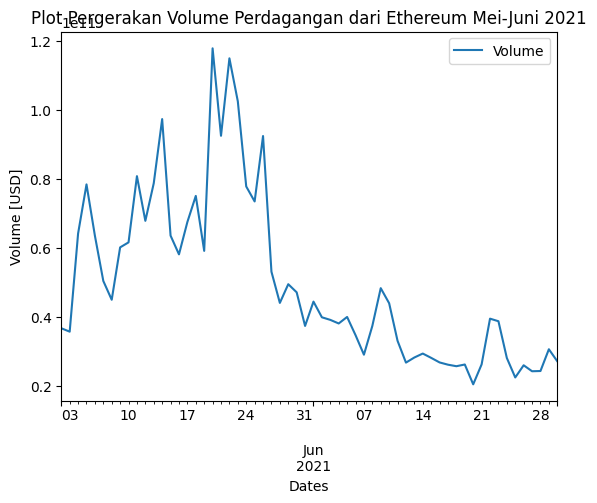

In [15]:
df.plot().set(xlabel='Dates', ylabel='Volume [USD]', title='Plot Pergerakan Volume Perdagangan dari Ethereum Mei-Juni 2021')


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [16]:
df.describe()

,Volume
count,60.00
mean,"50,009,212,026.97"
std,"24,612,258,938.51"
min,"20,456,963,375.00"
25%,"28,846,592,202.25"
50%,"41,985,007,806.50"
75%,"63,738,959,441.50"
max,"117,905,041,184.00"


<AxesSubplot:>

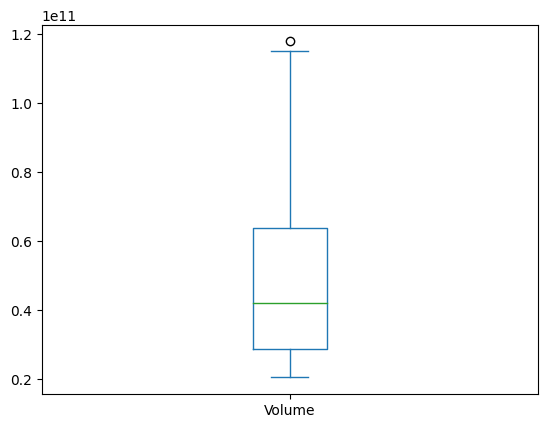

In [17]:
df['Volume'].plot.box()

In [18]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers
outliers = find_outliers_IQR(df['Volume'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers


number of outliers: 1
max outlier value: 117905041184.0
min outlier value: 117905041184.0


Dates
2021-05-20   117,905,041,184.00
Name: Volume, dtype: float64

In [19]:
df['Volume'].max() 
df[df['Volume'] == df['Volume'].max()]

,Volume
Dates,
2021-05-20,"117,905,041,184.00"


In [20]:
df['Volume'].min() 
df[df['Volume'] == df['Volume'].min()]

,Volume
Dates,
2021-06-20,"20,456,963,375.00"


(Put your analysis and conclusion here.)

## Analysis and Conclusion
1. Webscrapping from Etherium Website using BeautifulSoup alredy succes and got 60 data since 02-05-2021 to 30-06-2021.
2. Initial Volume began at 2021-05-02 about 36,721,647,718 USD and closed at 2021-06-30 about 27,149,143,847.
3. The highest Volume recorded was 117,905,041,184.00 USD that happend at 20-05-2021 which also noted as outlier.
4. The lowest Volume recorded was 20,456,963,375.00 USD that happned at 20-06-2020.
5. The average Volume during  02-05-2021 to 30-06-2021 was 41,985,007,806.50 USD.


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.